In [1]:
import numpy as np
import scipy
import scipy.linalg
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', unicode=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}')
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

### Фазовые траектории для искусственных рядов

In [2]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

In [3]:
def Svd(H, verbose=False):
    U, s, VT = np.linalg.svd(H)
    if verbose:
        print(s[:5])
    return U, s, VT

In [4]:
def FindKnnIdx(H, t, n_neighbors, verbose=False):
    # H_y = HankelMatrix(Y, L)
    # U, s, VT = Svd(H, verbose)
    # Uy, sy, VTy = np.linalg.svd(H_y)
    
    norm_list = np.array([np.linalg.norm(row - H[t]) for row in H])
    knn_idx = norm_list.argsort()[:n_neighbors + 1]
    
    return knn_idx

In [5]:
def Projection(U, s, V):
    print(U.shape, s.shape, V.shape)
    L = V.shape[1]
    S = np.zeros((U.shape[0], L))
    S[:L, :L] = np.diag(s)
    
    return U.dot(S)

In [6]:
def PlotTsWithKnn(X, knn_idx, t_max=None, savefig=False, filename=None):
    plt.figure(figsize=(16, 6))

    plot_idx = []
    for idx in knn_idx:
        if t_max is not None and idx < t_max or t_max is None:
            plot_idx.append(idx)
            
    print(X.shape)
    print(plot_idx)
    if t_max is None:
        right = X.shape[0]
    elif t_max > X.shape[0]:
        right = X.shape[0]
    else:
        right = t_max
        
    
    plt.plot(X[0 : right], zorder=0)
    plt.scatter(plot_idx, X[plot_idx], color='red', zorder=1)
    plt.scatter(plot_idx[0], X[plot_idx[0]], color='black', zorder=1)

    plt.xticks(size=14)
    plt.yticks(size=14)
    
    if savefig and filename is not None:
        plt.savefig(filename)

    plt.show()

In [7]:
def PlotKnnOnPhaseTrajectories(Pr_list, savefig=False, filename=None):
    n = len(Pr_list)
    fig, ax = plt.subplots(1, n, figsize=(8 * n, 6))

    for i, Pr in enumerate(Pr_list):
        coords, knn_idx, title, idx, lims = Pr
        knn_pr = coords[knn_idx]
        ax[i].plot(coords[:, idx[0]][lims[0]:lims[1]], coords[:, idx[1]][lims[0]:lims[1]], zorder=0)

        # ax[i].plot(coords[:, 1][:400], coords[:, 2][:400], zorder=0)
        ax[i].scatter(knn_pr[:, idx[0]], knn_pr[:, idx[1]], 
                      color='red', zorder=1, facecolors='none', s=80, lw=2)
        ax[i].scatter(knn_pr[0, idx[0]], knn_pr[0, idx[1]], 
                      color='black', zorder=2, facecolors='none', s=80, lw=2)

        ax[i].set_xlabel('$y_1$', fontsize=18)
        ax[i].set_ylabel('$y_2$', fontsize=18)
        ax[i].set_title(str(len(knn_idx)) + ' neighbors, ' + title, fontsize=20)

    plt.setp(ax[0].get_xticklabels(), fontsize=14)
    plt.setp(ax[1].get_xticklabels(), fontsize=14)

    if savefig and filename is not None:
        plt.savefig(filename)
    plt.show()

In [8]:
N = 4000
N = 4000

t_max = 400

x_ampl = 2
x_shift = 0.3

y_scale = 2
y_shift = 0.5

np.random.seed(42)
x = np.sin(np.linspace(0, t_max, N + 1)) + 2 * np.sin(np.linspace(0, t_max, N + 1) / 2) * 0.4 + \
    np.random.randn(N + 1) * 0.3
y = np.sin(np.linspace(0, t_max, N + 1) * y_scale + y_shift) + np.random.randn(N + 1) * 0.25

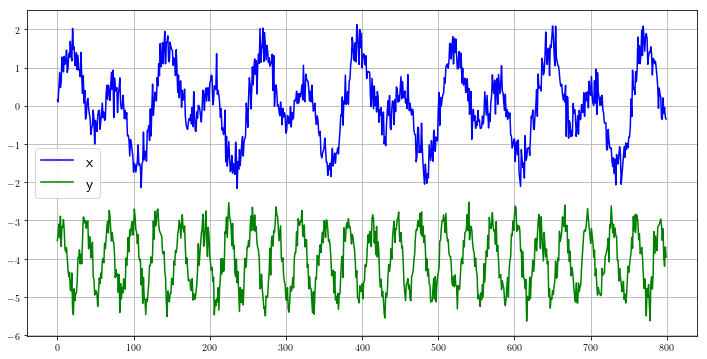

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(x[:N // 5], label='x', color='blue')
plt.plot(y[:N // 5] - 4, label='y', color='green')

plt.grid()
plt.legend(fontsize=16)
plt.show()

(4001,)
[15, 1775, 267, 1650, 769, 268, 2404, 771, 2405, 1777, 2402, 265, 1774, 770, 1271, 266, 1649, 141]


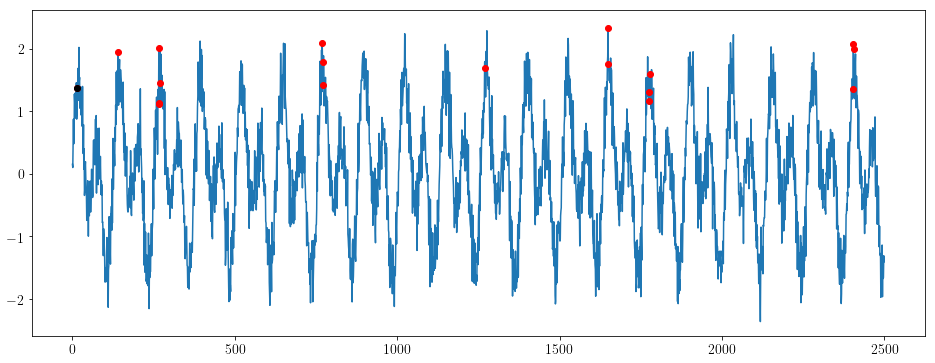

In [10]:
L = 100

H_X = HankelMatrix(x, L)
H_Y = HankelMatrix(y, L)

X_knn_idx = FindKnnIdx(H_X, t=15, n_neighbors=24)
PlotTsWithKnn(x, X_knn_idx, t_max=2500, savefig=False, filename='../text/pictures/generated_data/X_sin_knn.eps')

In [11]:
X_svd_data = Svd(H_X, verbose=True)
Y_svd_data = Svd(H_Y, verbose=True)

Pr_x = Projection(*X_svd_data)
Pr_y = Projection(*Y_svd_data)

[325.54372655 323.22865677 269.13959617 190.98477391  21.49636225]
[320.8485117  306.08156744  18.52498082  18.5056355   18.18143843]
(3902, 3902) (100,) (100, 100)
(3902, 3902) (100,) (100, 100)


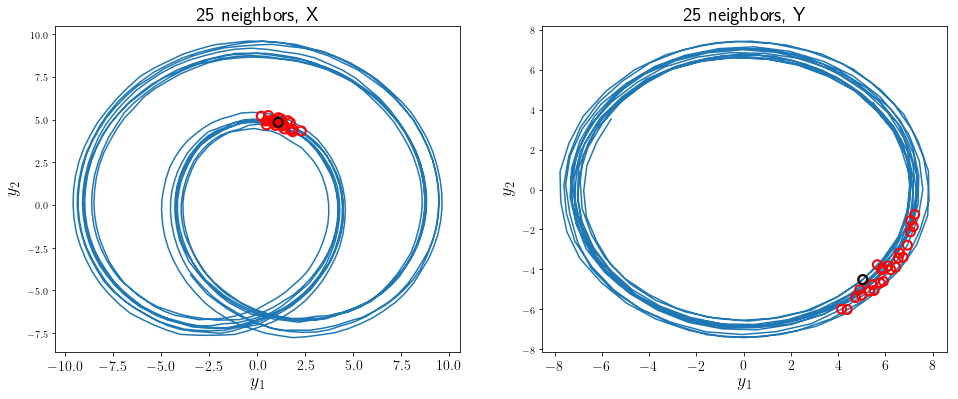

In [12]:
PlotKnnOnPhaseTrajectories([(Pr_x, X_knn_idx, 'X', [0, 1], [0, 1000]), 
                            (Pr_y, X_knn_idx, 'Y', [0, 1], [0, 400])],
                           savefig=False, filename='../text/pictures/generated_data/phase_tr_by_X.eps')

(4001,)
[20, 1088, 114, 334, 83, 239, 1685, 365, 962, 1120, 1464, 679, 1057, 2220, 2282, 428, 1245, 2062, 554]


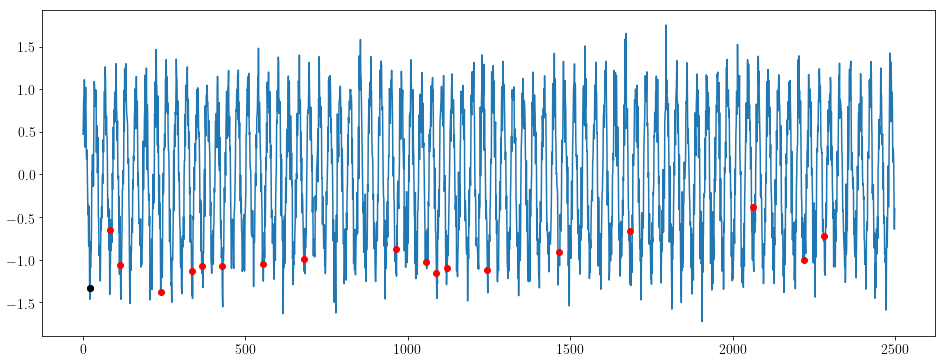

In [13]:
Y_knn_idx = FindKnnIdx(H_Y, t=20, n_neighbors=24)
PlotTsWithKnn(y, Y_knn_idx, t_max=2500, savefig=False, filename='../text/pictures/generated_data/Y_sin_knn.eps')

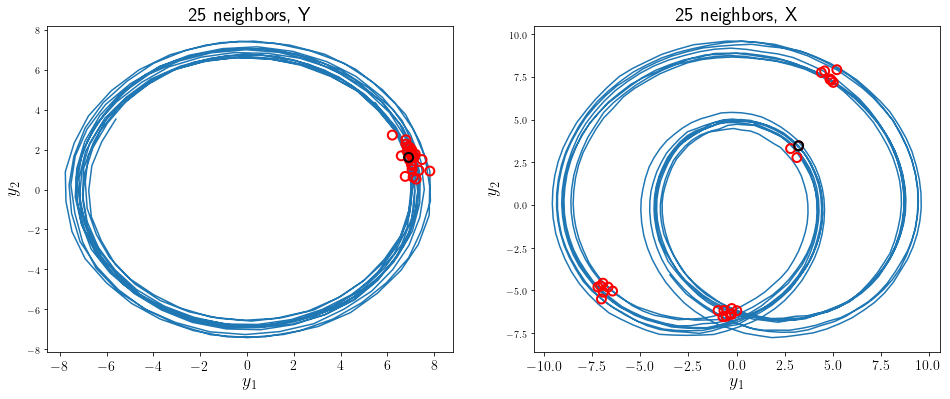

In [14]:
PlotKnnOnPhaseTrajectories([(Pr_y, Y_knn_idx, 'Y', [0, 1], [0, 400]), 
                            (Pr_x, Y_knn_idx, 'X', [0, 1], [0, 1000])], 
                           savefig=False, filename='../text/pictures/generated_data/phase_tr_by_Y.eps')

In [15]:
data = pd.read_csv('../data/EnergyConsumption.csv').iloc[:, 3:]

In [16]:
print(data.shape)
data.head()

(8760, 2)


,ConsumprionMWtH,TemperatureC
0,1289.617859,-10.676569
1,1265.573853,-12.041959
2,1273.188232,-13.198006
3,1279.703979,-13.999279
4,1292.839539,-14.782819


In [17]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [18]:
scaled_data.shape

(8760, 2)

In [19]:
def MakeStationary(ts):
    new_ts = []
    for i in range(1, len(ts)):
        new_ts.append(ts[i] - ts[i - 1])
    return new_ts

In [34]:
X = np.array(MakeStationary(scaled_data[:, 0]))
Y = np.array(MakeStationary(scaled_data[:, 1]))

In [35]:
left = 3000
right = 3400

# left = 0
# right = 400

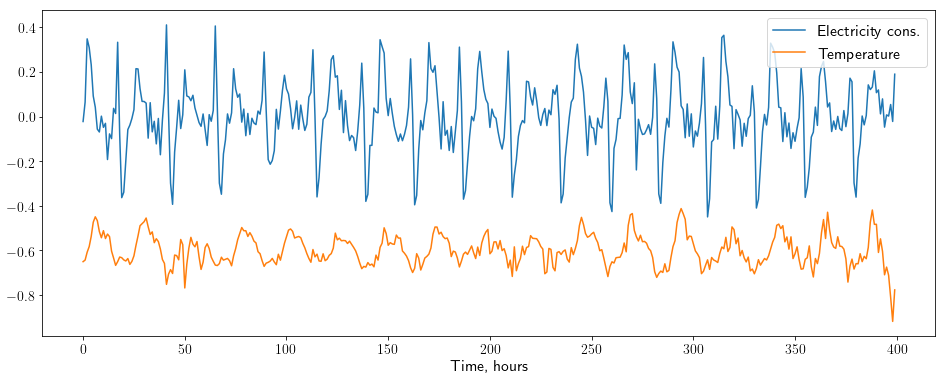

In [429]:
plt.figure(figsize=(16, 6))

plt.plot(X[left:right], label='Electricity cons.')
plt.plot(Y[left:right] - 0.6, label='Temperature')

plt.xlabel('Time, hours', fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.legend(loc=1, fontsize=16)
# plt.savefig('../text/pictures/energy_temp/energy_temp_ts.eps')
plt.show()

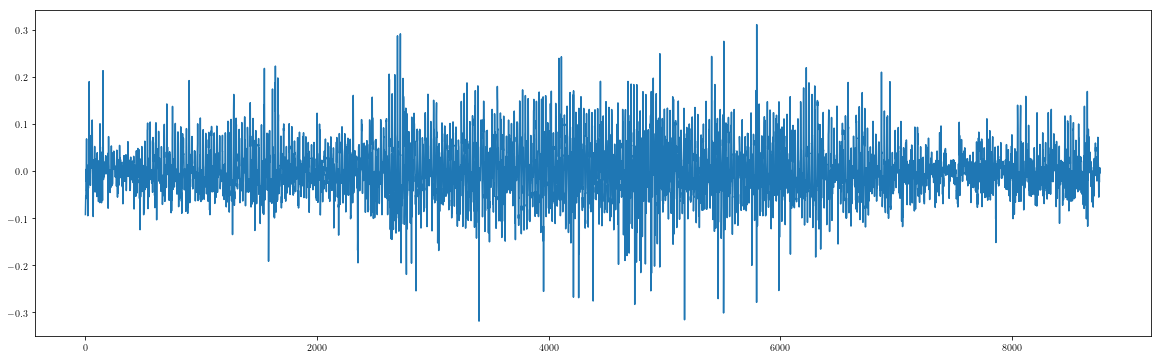

In [229]:
plt.figure(figsize=(20, 6))
plt.plot(Y)
plt.show()

In [213]:
sorted_idx = abs(Y).argsort()[::-1]

In [214]:
Y[sorted_idx][:20]

array([ 1.08977127, -0.97367073, -0.4299574 , -0.38121625, -0.3703371 ,
       -0.36060366, -0.35699269, -0.35233702, -0.32796299, -0.32472259,
       -0.31985236, -0.31695386,  0.31062138, -0.30252029,  0.29097413,
        0.28675969, -0.2843087 , -0.27989122, -0.27707341,  0.27505997])

In [215]:
sorted_idx

array([2648, 2646, 5964, ...,  101, 2038, 2037])

In [228]:
for i in range(10):
    Y[sorted_idx[i]] *= 0.3

In [416]:
N = X.shape[0]
L = 100

In [417]:
H_X = HankelMatrix(X, L)
H_Y = HankelMatrix(Y, L)

In [418]:
X_svd_data = Svd(H_X, verbose=True)
Y_svd_data = Svd(H_Y, verbose=True)

Pr_x = Projection(*X_svd_data)
Pr_y = Projection(*Y_svd_data)

del X_svd_data, Y_svd_data

[73.6474046  71.49507006 67.84061572 66.5735663  30.05282296]
[24.79481341 24.04664649  9.96133563  9.84012962  7.20156178]
(8660, 8660) (100,) (100, 100)
(8660, 8660) (100,) (100, 100)


(8759,)
[500, 332, 668, 836, 188, 1004, 164, 212]


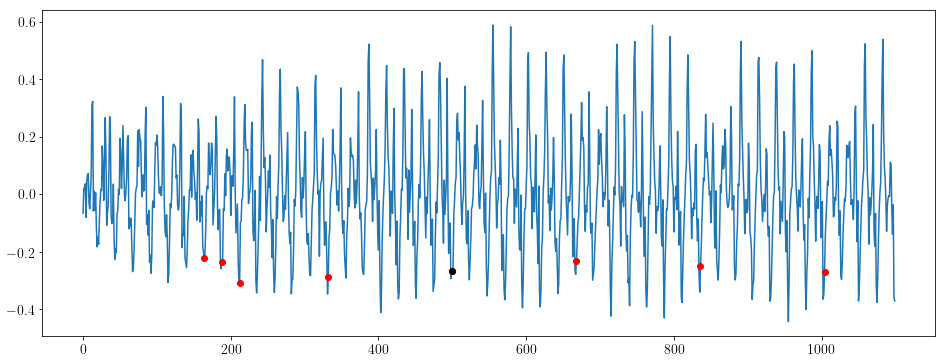

In [420]:
X_knn_idx = FindKnnIdx(H_X, t=500, n_neighbors=19)
PlotTsWithKnn(X, X_knn_idx, t_max=1100, savefig=True, 
              filename='../text/pictures/energy_temp/X_knn_L'+ str(L) + '.eps')

L = 100, n = 19, X --[100, 400], Y --  [0, 1500]

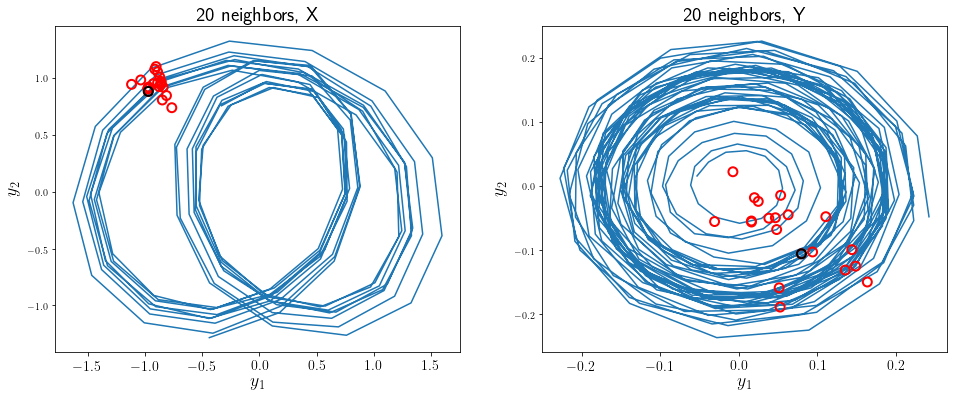

In [421]:
PlotKnnOnPhaseTrajectories([(Pr_x, X_knn_idx, 'X', [0, 1], [200, 400]),
                            (Pr_y, X_knn_idx, 'Y', [2, 3], [300, 800])],
                           savefig=False, filename='../text/pictures/energy_temp/by_X_L' + str(L) + '_12.eps')

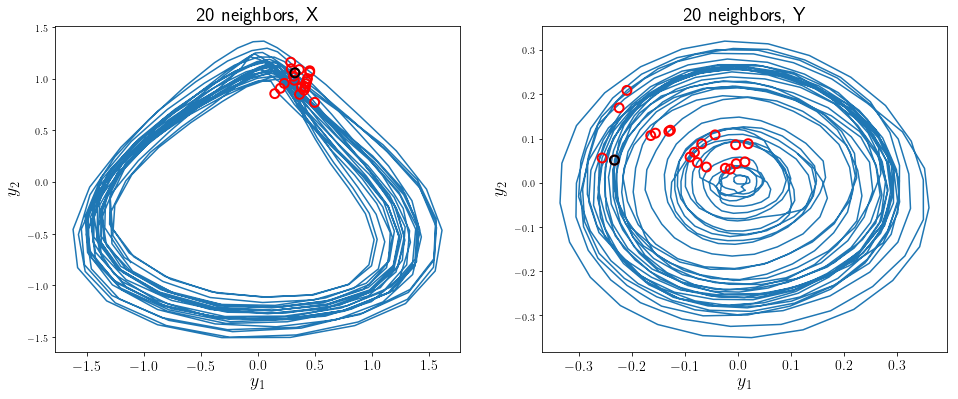

In [422]:
PlotKnnOnPhaseTrajectories([(Pr_x, X_knn_idx, 'X', [2, 3], [200, 800]),
                            (Pr_y, X_knn_idx, 'Y', [0, 1], [100, 1000])],
                           savefig=False, filename='../text/pictures/energy_temp/by_X_L' + str(L) + '_24.eps')

(8759,)
[100, 101, 99, 172, 484, 173, 244, 196, 844, 220, 843, 243]


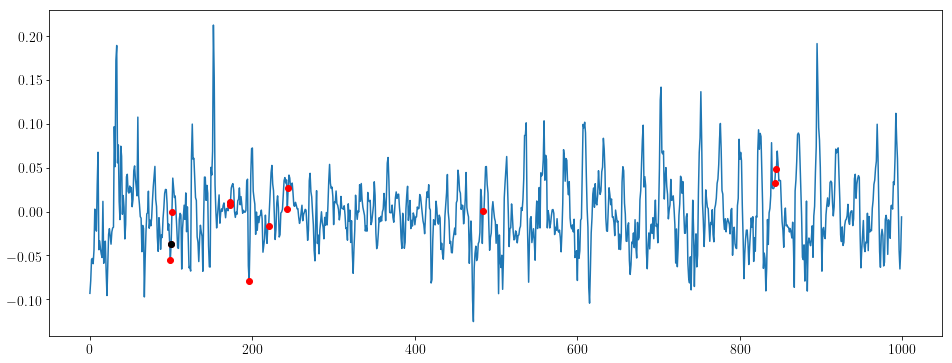

In [425]:
Y_knn_idx = FindKnnIdx(H_Y, t=100, n_neighbors=19)
PlotTsWithKnn(Y, Y_knn_idx, t_max=1000, savefig=False, 
              filename='../text/pictures/energy_temp/Y_knn_L'+ str(L) + '.eps')

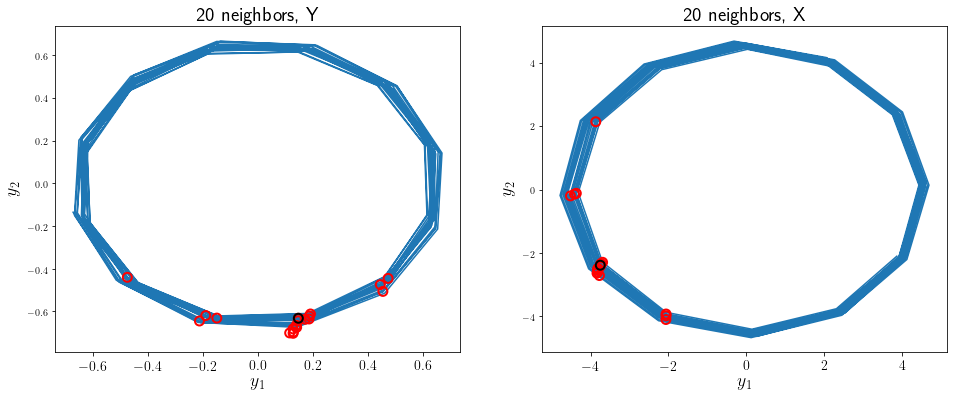

In [407]:
PlotKnnOnPhaseTrajectories([(Pr_y, Y_knn_idx, 'Y', [2, 3], [0, 200]), 
                            (Pr_x, Y_knn_idx, 'X', [0, 1], [0, 200])], 
                           savefig=False, filename='../text/pictures/energy_temp/by_Y_L' + str(L) + '_12.eps')

L = 1500, Y -- [0, 400], X -- [0, 400], t = 100, n = 19

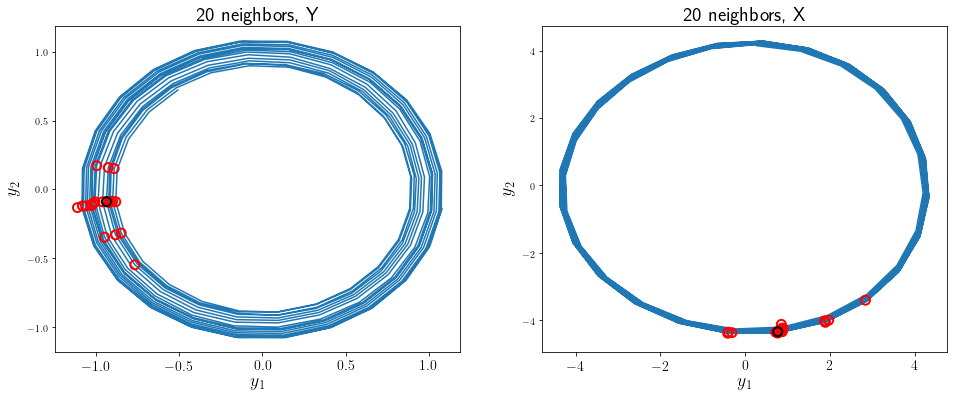

In [408]:
PlotKnnOnPhaseTrajectories([(Pr_y, Y_knn_idx, 'Y', [0, 1], [0, 400]), 
                            (Pr_x, Y_knn_idx, 'X', [2, 3], [0, 400])], 
                           savefig=False, filename='../text/pictures/energy_temp/by_Y_L' + str(L) + '_24.eps')

In [398]:
Y_knn_idx

array([100, 101,  99,  28, 172,   4,  27,  76,  29, 196, 316, 484, 220,
       124,  52, 173, 244, 102, 171, 340])

In [399]:
d = {}
t = 100
T = 12

def AddToDict(key, value):
    if key not in d:
        d[key] = []
    d[key].append(value)


for idx in Y_knn_idx[1:]:
    for shift in range(-5, 6):
        if (idx + shift - t) % T == 0:
            AddToDict(shift, idx)

In [400]:
d

{-2: [102],
 -1: [101, 29, 173],
 0: [28, 172, 4, 76, 196, 316, 484, 220, 124, 52, 244, 340],
 1: [99, 27, 171]}

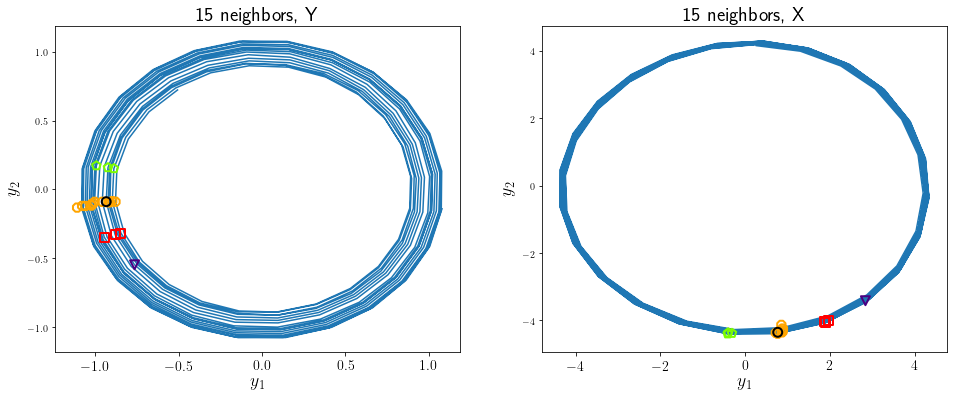

In [409]:
fit, ax = plt.subplots(1, 2, figsize=(16, 6))

# Y
idx = [0, 1]
lims = [0, 400]
ax[0].plot(Pr_y[:, idx[0]][lims[0]:lims[1]], 
           Pr_y[:, idx[1]][lims[0]:lims[1]], zorder=0)

ax[0].scatter(Pr_y[Y_knn_idx][0, idx[0]], Pr_y[Y_knn_idx][0, idx[1]], 
              color='black', zorder=2, facecolors='none', s=80, lw=2)

for shift, color, marker in zip(list(d.keys()), 
                                ['red', 'lawngreen', 'orange', 'indigo'], 
                                ['s', 'p', '8', 'v']):
    ax[0].scatter(Pr_y[d[shift]][:, idx[0]], Pr_y[d[shift]][:, idx[1]], 
                  color=color, zorder=1, facecolors='none', s=80, lw=2, marker=marker)
    
ax[0].set_xlabel('$y_1$', fontsize=18)
ax[0].set_ylabel('$y_2$', fontsize=18)
ax[0].set_title("15 neighbors, Y", fontsize=20)

# X
idx = [2, 3]
lims = [0, 400]
ax[1].plot(Pr_x[:, idx[0]][lims[0]:lims[1]], Pr_x[:, idx[1]][lims[0]:lims[1]], zorder=0)

ax[1].scatter(Pr_x[Y_knn_idx][0, idx[0]], Pr_x[Y_knn_idx][0, idx[1]], 
              color='black', zorder=2, facecolors='none', s=80, lw=2)

for shift, color, marker in zip(list(d.keys()), 
                                ['red', 'lawngreen', 'orange', 'indigo'], 
                                ['s', 'p', '8', 'v']):
    ax[1].scatter(Pr_x[d[shift]][:, idx[0]], Pr_x[d[shift]][:, idx[1]], 
                  color=color, zorder=1, facecolors='none', s=80, lw=2, marker=marker)

ax[1].set_xlabel('$y_1$', fontsize=18)
ax[1].set_ylabel('$y_2$', fontsize=18)
ax[1].set_title("15 neighbors, X", fontsize=20)


plt.setp(ax[0].get_xticklabels(), fontsize=14)
plt.setp(ax[1].get_xticklabels(), fontsize=14)

# plt.savefig('../text/pictures/energy_temp/by_Y_L' + str(L) + '_24_colored.eps')
plt.show()

In [ ]:

for idx in Y_knn_idx[1:]:
    if (idx - 1 - 100) % 12 == 0:
        if -1 not in d:
            d[-1] = []
        d[-1].append[idx]

In [350]:
Pr_y[Y_knn_idx, :2]

array([[-0.93515333, -0.09060439],
       [-0.88099888, -0.33262129],
       [-0.92446472,  0.15762603],
       [-0.89880003, -0.08705424],
       [-1.00457542, -0.09155759],
       [-0.8794328 , -0.09111536],
       [-0.88914132,  0.15069306],
       [-0.91300788, -0.09454521],
       [-0.84675468, -0.31963922],
       [-1.0134158 , -0.1033825 ],
       [-1.06039173, -0.12195364],
       [-1.10967339, -0.13377446],
       [-1.02431786, -0.11935389],
       [-0.95877769, -0.09176714],
       [-0.9224694 , -0.09502915],
       [-0.94682576, -0.34904292],
       [-1.02496422, -0.11049927],
       [-0.76520768, -0.55028463],
       [-0.994259  ,  0.17134786],
       [-1.07967845, -0.12155427]])

### Фазовые траектории для искусственных рядов

In [81]:
def HankelMatrix(X, L):
    N = X.shape[0]
    return scipy.linalg.hankel(X[ : N - L + 1], X[N - L : N])

In [96]:
def Svd(H, verbose=False):
    U, s, VT = np.linalg.svd(H)
    if verbose:
        print(s[:5])
    return U, s, VT

In [65]:
def FindKnnIdx(H, t, n_neighbors, verbose=False):
    # H_y = HankelMatrix(Y, L)
    # U, s, VT = Svd(H, verbose)
    # Uy, sy, VTy = np.linalg.svd(H_y)
    
    norm_list = np.array([np.linalg.norm(row - H[t]) for row in H])
    knn_idx = norm_list.argsort()[:n_neighbors + 1]
    
    return knn_idx

In [514]:
def Projection(U, s, V):
    print(U.shape, s.shape, V.shape)
    L = V.shape[1]
    S = np.zeros((U.shape[0], L))
    S[:L, :L] = np.diag(s)
    
    return U.dot(S)

In [737]:
def PlotTsWithKnn(X, knn_idx, t_max=None, savefig=False, filename=None):
    plt.figure(figsize=(16, 6))

    plot_idx = []
    for idx in knn_idx:
        if t_max is not None and idx < t_max or t_max is None:
            plot_idx.append(idx)
            
    print(X.shape)
    print(plot_idx)
    if t_max is None:
        right = X.shape[0]
    elif t_max > X.shape[0]:
        right = X.shape[0]
    else:
        right = t_max
        
    
    plt.plot(X[0 : right], zorder=0)
    plt.scatter(plot_idx, X[plot_idx], color='red', zorder=1)
    plt.scatter(plot_idx[0], X[plot_idx[0]], color='black', zorder=1)

    plt.xticks(size=14)
    plt.yticks(size=14)
    
    if savefig and filename is not None:
        plt.savefig(filename)

    plt.show()

In [654]:
def PlotKnnOnPhaseTrajectories(Pr_list, savefig=False, filename=None):
    n = len(Pr_list)
    fig, ax = plt.subplots(1, n, figsize=(8 * n, 6))

    for i, Pr in enumerate(Pr_list):
        coords, knn_idx, title, idx, lims = Pr
        knn_pr = coords[knn_idx]
        ax[i].plot(coords[:, idx[0]][lims[0]:lims[1]], coords[:, idx[1]][lims[0]:lims[1]], zorder=0)

        # ax[i].plot(coords[:, 1][:400], coords[:, 2][:400], zorder=0)
        ax[i].scatter(knn_pr[:, idx[0]], knn_pr[:, idx[1]], 
                      color='red', zorder=1, facecolors='none', s=80, lw=2)
        ax[i].scatter(knn_pr[0, idx[0]], knn_pr[0, idx[1]], 
                      color='black', zorder=2, facecolors='none', s=80, lw=2)

        ax[i].set_xlabel('$y_1$', fontsize=18)
        ax[i].set_ylabel('$y_2$', fontsize=18)
        ax[i].set_title(str(len(knn_idx)) + ' neighbors, ' + title, fontsize=20)

    plt.setp(ax[0].get_xticklabels(), fontsize=14)
    plt.setp(ax[1].get_xticklabels(), fontsize=14)

    if savefig and filename is not None:
        plt.savefig(filename)
    plt.show()

In [589]:
N = 4000
N = 4000

t_max = 400

x_ampl = 2
x_shift = 0.3

y_scale = 2
y_shift = 0.5

np.random.seed(42)
x = np.sin(np.linspace(0, t_max, N + 1)) + 2 * np.sin(np.linspace(0, t_max, N + 1) / 2) * 0.4 + \
    np.random.randn(N + 1) * 0.3
y = np.sin(np.linspace(0, t_max, N + 1) * y_scale + y_shift) + np.random.randn(N + 1) * 0.25

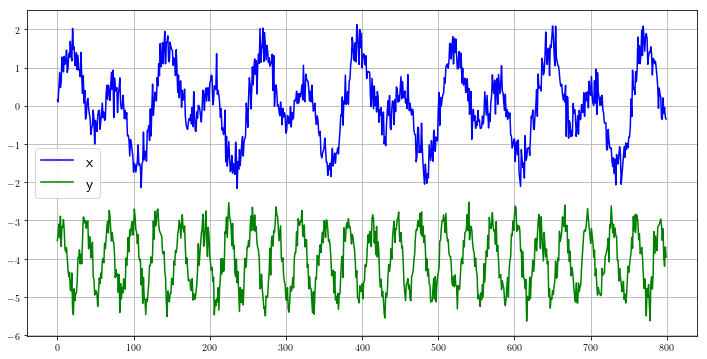

In [590]:
plt.figure(figsize=(12, 6))
plt.plot(x[:N // 5], label='x', color='blue')
plt.plot(y[:N // 5] - 4, label='y', color='green')

plt.grid()
plt.legend(fontsize=16)
plt.show()

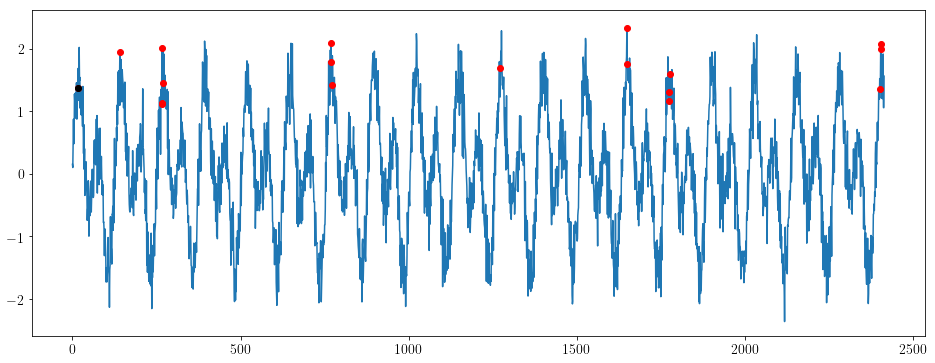

In [607]:
L = 100

H_X = HankelMatrix(x, L)
H_Y = HankelMatrix(y, L)

X_knn_idx = FindKnnIdx(H_X, t=15, n_neighbors=24)
PlotTsWithKnn(x, X_knn_idx, t_max=2500, savefig=False, filename='../text/pictures/generated_data/X_sin_knn.eps')

In [608]:
X_svd_data = Svd(H_X, verbose=True)
Y_svd_data = Svd(H_Y, verbose=True)

Pr_x = Projection(*X_svd_data)
Pr_y = Projection(*Y_svd_data)

[325.54372655 323.22865677 269.13959617 190.98477391  21.49636225]
[320.8485117  306.08156744  18.52498082  18.5056355   18.18143843]
(3902, 3902) (100,) (100, 100)
(3902, 3902) (100,) (100, 100)


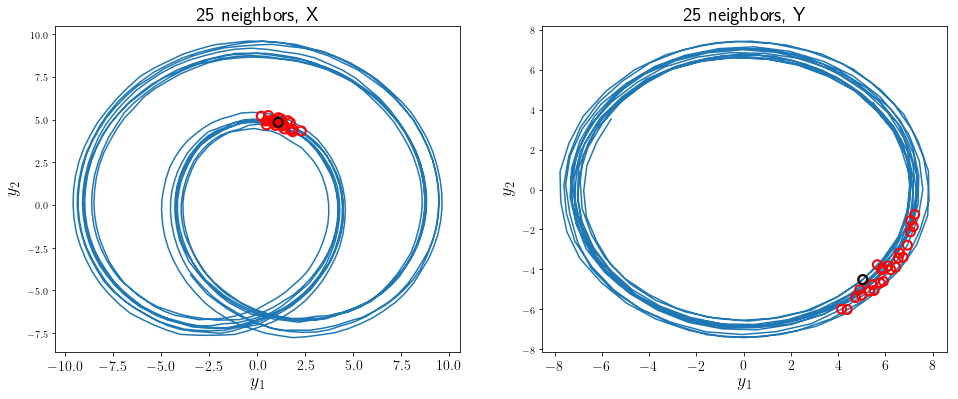

In [609]:
PlotKnnOnPhaseTrajectories([(Pr_x, X_knn_idx, 'X', [0, 1], [0, 1000]), 
                            (Pr_y, X_knn_idx, 'Y', [0, 1], [0, 400])],
                           savefig=False, filename='../text/pictures/generated_data/phase_tr_by_X.eps')

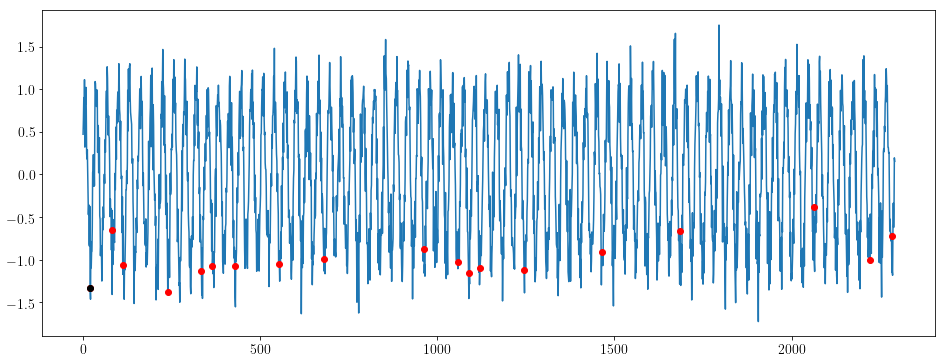

In [611]:
Y_knn_idx = FindKnnIdx(H_Y, t=20, n_neighbors=24)
PlotTsWithKnn(y, Y_knn_idx, t_max=2500, savefig=False, filename='../text/pictures/generated_data/Y_sin_knn.eps')

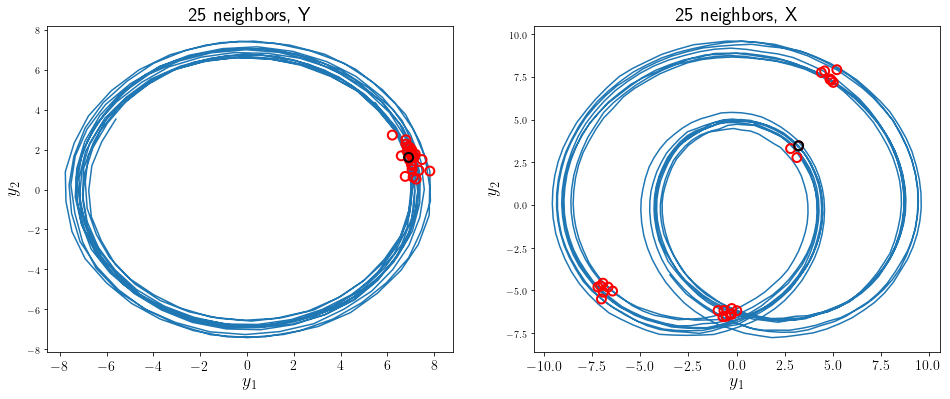

In [612]:
PlotKnnOnPhaseTrajectories([(Pr_y, Y_knn_idx, 'Y', [0, 1], [0, 400]), 
                            (Pr_x, Y_knn_idx, 'X', [0, 1], [0, 1000])], 
                           savefig=False, filename='../text/pictures/generated_data/phase_tr_by_Y.eps')